In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Helpers

In [20]:
def get_df(yr):
    return pd.read_csv("./inputs/Environmental_Data_Deep_Moor_{}.csv".format(yr))

def monthly_avg_calc(mo,col):
    return df[df['date'].str.contains('201[2345]_[0]?'+ str(mo))][col].mean()

def get_seasons(yr):
    df = get_df(yr)
    return [df[df['date'].between('{}_03_20'.format(yr),'{}_06_19'.format(yr))],
            df[df['date'].between('{}_06_20'.format(yr),'{}_09_21'.format(yr))],
            df[df['date'].between('{}_09_22'.format(yr),'{}_12_20'.format(yr))],
            df[~df['date'].between('{}_03_20'.format(yr),'{}_12_20'.format(yr))]]

In [6]:
def yearly_av(category):
    return list(map(lambda m: monthly_avg_calc(m, category), range(1,13)))

In [7]:
df = get_df(2014)

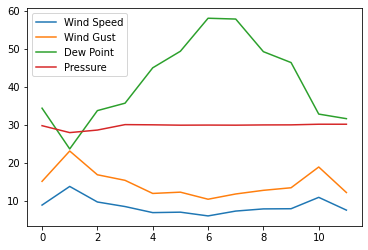

In [12]:
plt.plot(yearly_av('Wind_Speed'), label='Wind Speed')
plt.plot(yearly_av('Wind_Gust'), label='Wind Gust')
plt.plot(yearly_av('Dew_Point'), label='Dew Point')
plt.plot(yearly_av('Barometric_Press'), label='Pressure')
plt.legend()
plt.show()

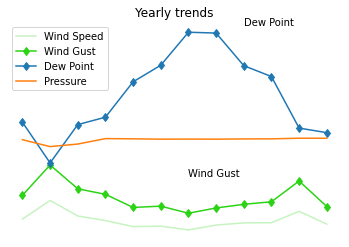

In [19]:
plt.plot(yearly_av('Wind_Speed'), label='Wind Speed', color="#2BD31444")
plt.plot(yearly_av('Wind_Gust'), 'd-', label='Wind Gust', color="#2BD314FF")
plt.plot(yearly_av('Dew_Point'), 'd-', label='Dew Point')
plt.plot(yearly_av('Barometric_Press'), label='Pressure')
plt.title("Yearly trends")
plt.text(8,60, 'Dew Point')
plt.text(6,20, 'Wind Gust')
plt.axis("off")
plt.legend()
plt.show()

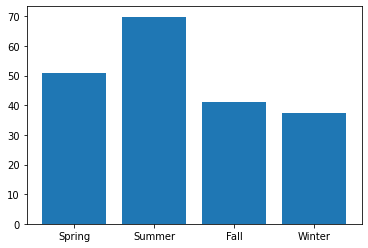

In [22]:
seasons = ["Spring","Summer","Fall","Winter"]
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')]
plt.bar(seasons, heights)
plt.show()

### Calculate RGBA tupples for the colors

RGB or RGBA (red, green, blue, alpha) tuple of float values in a closed interval [0, 1]. Where A is the opacity the color will take.

In [37]:
alphas = [height/max(heights) for height in heights]
colors = [(.1,.7,.2,a) for a in alphas]
print(colors)

[(0.1, 0.7, 0.2, 0.7294745068838709), (0.1, 0.7, 0.2, 1.0), (0.1, 0.7, 0.2, 0.588804878740897), (0.1, 0.7, 0.2, 0.5358763109369538)]


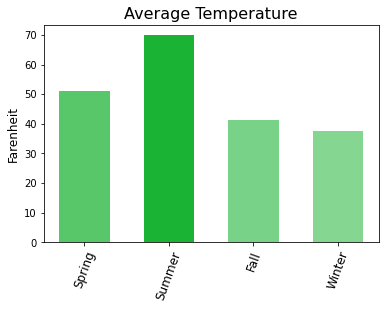

In [29]:
plt.bar(seasons, heights, .6, color = colors)
plt.title('Average Temperature', fontsize=16)
plt.ylabel('Farenheit', fontsize=12)
plt.xticks(rotation=70, fontsize=12)
plt.show()

In [35]:
heights14 = [season['Air_Temp'].mean() for season in get_seasons('2014')]
alphas14 = [height/max(heights) for height in heights14]
colors14 = [(.2,.1,.7,a) for a in alphas14]

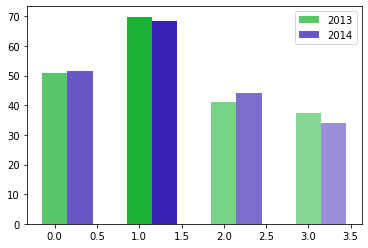

In [36]:
index = np.arange(4)
fig, ax = plt.subplots()
rects1 = ax.bar(index, heights, .3, color=colors, label='2013')
rects2 = ax.bar(index+.3, heights14, .3, color=colors14, label='2014')
ax.legend()
plt.show()